In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [135]:
baseline = torch.load("baseline/seed0-lr0.001-trainsamp1000-taskSTTC/eval_logs.ckpt", weights_only=False)
taskaug = torch.load("taskaug/seed0-lr0.001-hyperlr0.01-neumann1-warmup5-num_base_steps1-trainsamp1000-auglearnmag-taskSTTC/eval_logs.ckpt", weights_only=False)

In [113]:
baseline[('test_ld')], taskaug['test_ld']

({'epoch_loss': [0.39189280735121834],
  'auc': [np.float64(0.8711356194282588)],
  'auprc': [np.float64(0.688674454059169)]},
 {'epoch_loss': [0.3677425158902447],
  'auc': [np.float64(0.8857021209384732)],
  'auprc': [np.float64(0.7136298826239281)]})

In [83]:
np.mean(baseline['train_ld']['loss'])

np.float64(0.06587443478767195)

In [84]:
np.mean(baseline['val_ld']['epoch_loss']), np.mean(baseline['val_ld']['auc']), np.mean(baseline['val_ld']['auprc'])

(np.float64(0.8941128300875425),
 np.float64(0.8706704889313585),
 np.float64(0.6703451486688994))

In [85]:
taskaug[('test_ld')]

{'epoch_loss': [0.3876312607738297],
 'auc': [np.float64(0.8408241253174633)],
 'auprc': [np.float64(0.6834284315827297)]}

In [86]:
np.mean(taskaug['train_ld']['loss'])

np.float64(0.09294438834767789)

In [87]:
np.mean(taskaug['val_ld']['epoch_loss']), np.mean(taskaug['val_ld']['auc']), np.mean(taskaug['val_ld']['auprc'])

(np.float64(0.893169894504547),
 np.float64(0.8564787386526518),
 np.float64(0.6906407444169629))

Text(0.5, 1.0, 'Test AUPRC Task CD')

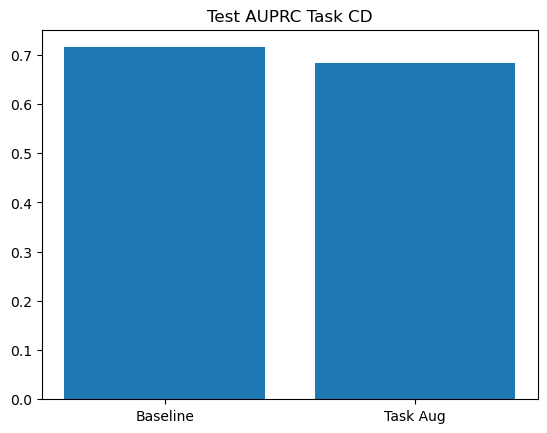

In [90]:
plt.bar(['Baseline', 'Task Aug'], [baseline['test_ld']['auprc'][0], taskaug['test_ld']['auprc'][0]])
plt.title('Test AUPRC Task CD')

Text(0.5, 1.0, 'Loss for STTC Task with validation dataset')

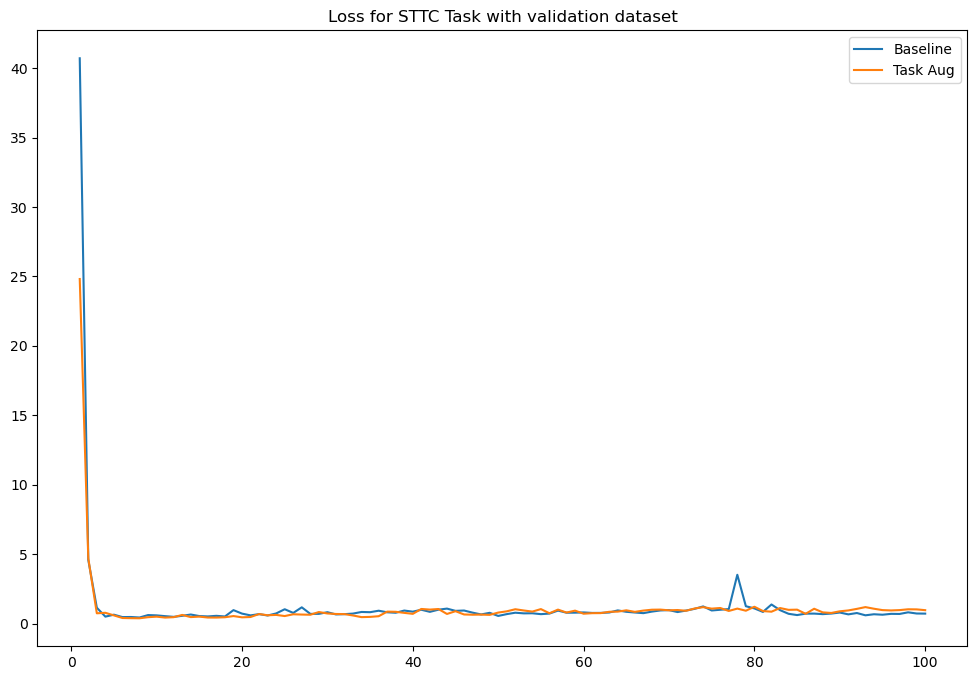

In [138]:
plt.figure(figsize=(12, 8))
label = 'epoch_loss'
y = baseline['val_ld'][label]
y2 = taskaug['val_ld'][label]
x = np.arange(1, len(y) +1)
plt.plot(x, y)
plt.plot(x, y2)
plt.legend(['Baseline', 'Task Aug'])
plt.title('Loss for STTC Task with validation dataset')

In [102]:
((taskaug['test_ld']['epoch_loss'][0] - baseline['test_ld']['epoch_loss'][0]) / taskaug['test_ld']['epoch_loss'][0]) * 100

-10.293807664909297

In [75]:
taskaug['test_ld']['epoch_loss'], baseline['test_ld']['epoch_loss']

([0.5041421193009187], [0.493919774889946])

In [115]:
((0.71-0.68)/0.71) * 100

4.2253521126760445